In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#  **Dataset Infomation**

In [2]:
data= pd.read_csv('../Data/cleanest_data1604.csv')
data = data.drop(['Unnamed: 0'], axis=1)
df = data.__deepcopy__()
df.head()

Exchanges        id  Cash Ratio  Current Ratio  TT Liabilities on Equity  \
0       HNX  NBW_2017    0.215835       0.784774                  0.588822   
1      HOSE  SBA_2017    0.048553       0.838809                  0.940949   
2       HNX  GDW_2017    0.187180       0.929911                  0.913852   
3      HOSE  TDW_2017    0.148415       0.628571                  1.620773   
4       HNX  PCG_2017    0.380951       5.350412                  0.188574   

   TT Liabilities on Asset  ST Liabilities on TT Liabilities  \
0                 0.370603                          0.993110   
1                 0.484788                          0.233738   
2                 0.477494                          0.750435   
3                 0.618433                          0.553863   
4                 0.158656                          0.984993   

   ST Liabilities on Equity  ST Liabilities on Asset  \
0                  0.584766                 0.368050   
1                  0.219936                 0.113313   
2                  0.685787                 0.358328   
3                  0.897686                 0.342527   
4                  0.185744                 0.156275   

   TT Debt on TT Liabilities  ...       ROA  Gross Profit Margin  \
0                   0.000000  ...  0.044803            29.695238   
1                   0.766262  ...  0.098084            66.443021   
2                   0.246568  ...  0.062057            36.401852   
3                   0.491506  ...  0.053712            33.268466   
4                   0.000000  ...  0.010159             6.490316   

   EBITDA Margin  Operating Profit Margin  Income Aft Tax Margin  \
0       6.285088                 2.407708               1.923696   
1      61.019875                43.634650              40.811668   
2       9.733964                 3.958465               3.713727   
3      11.367815                 1.893066               2.870898   
4      -0.981446                 0.765269               0.796215   

   Asset Turnover Ratio  Inflation     GDP  Industry  Industry_year  
0              2.436282        4.4  281.35   tienIch   tienIch_2017  
1              0.238847        4.4  281.35   tienIch   tienIch_2017  
2              1.853428        4.4  281.35   tienIch   tienIch_2017  
3              1.877656        4.4  281.35   tienIch   tienIch_2017  
4              1.297614        4.4  281.35   tienIch   tienIch_2017  

[5 rows x 28 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Exchanges                         2929 non-null   object 
 1   id                                2929 non-null   object 
 2   Cash Ratio                        2929 non-null   float64
 3   Current Ratio                     2929 non-null   float64
 4   TT Liabilities on Equity          2929 non-null   float64
 5   TT Liabilities on Asset           2929 non-null   float64
 6   ST Liabilities on TT Liabilities  2929 non-null   float64
 7   ST Liabilities on Equity          2929 non-null   float64
 8   ST Liabilities on Asset           2929 non-null   float64
 9   TT Debt on TT Liabilities         2929 non-null   float64
 10  TT Debt on Equity                 2929 non-null   float64
 11  TT Debt on Asset                  2929 non-null   float64
 12  ST Deb

In [4]:
df.describe()

Cash Ratio  Current Ratio  TT Liabilities on Equity  \
count  2929.000000    2929.000000               2929.000000   
mean      0.173465       2.251596                  1.398178   
std       0.296472       2.275826                  1.246859   
min       0.000022       0.033829                  0.017146   
25%       0.036399       1.152798                  0.484879   
50%       0.087929       1.524300                  1.008412   
75%       0.195287       2.389873                  1.945512   
max       4.890943      19.031569                  6.556677   

       TT Liabilities on Asset  ST Liabilities on TT Liabilities  \
count              2929.000000                       2929.000000   
mean                  0.487263                          0.799965   
std                   0.209449                          0.227309   
min                   0.016857                          0.045883   
25%                   0.326544                          0.675341   
50%                   0.502094                          0.894459   
75%                   0.660500                          0.987945   
max                   0.867667                          1.027040   

       ST Liabilities on Equity  ST Liabilities on Asset  \
count               2929.000000              2929.000000   
mean                   1.081124                 0.381313   
std                    1.036678                 0.197197   
min                    0.016829                 0.016546   
25%                    0.347402                 0.222960   
50%                    0.736022                 0.367121   
75%                    1.471796                 0.528288   
max                    5.987908                 0.851655   

       TT Debt on TT Liabilities  TT Debt on Equity  TT Debt on Asset  ...  \
count                2929.000000        2929.000000       2929.000000  ...   
mean                    0.321333           0.526292          0.174782  ...   
std                     0.267147           0.669858          0.166021  ...   
min                     0.000000           0.000000          0.000000  ...   
25%                     0.039449           0.023681          0.014094  ...   
50%                     0.296530           0.256852          0.137515  ...   
75%                     0.537582           0.770043          0.290002  ...   
max                     0.963603           4.990122          0.752839  ...   

       ST Debt on Asset          ROE          ROA  Gross Profit Margin  \
count       2929.000000  2929.000000  2929.000000          2929.000000   
mean           0.113545     0.109316     0.055889            18.670545   
std            0.142921     0.103212     0.060879            14.098555   
min            0.000000    -0.386122    -0.281185           -48.171017   
25%            0.000000     0.042945     0.017420             8.783963   
50%            0.053156     0.095787     0.043982            15.163483   
75%            0.185861     0.162173     0.080887            25.391627   
max            0.752839     0.592158     0.476819            91.652931   

       EBITDA Margin  Operating Profit Margin  Income Aft Tax Margin  \
count    2929.000000              2929.000000            2929.000000   
mean       12.576670                 8.744620               7.614086   
std        13.430433                13.116133              11.399106   
min       -66.593628               -86.085156             -92.453135   
25%         4.610474                 2.085372               1.794999   
50%         9.421263                 5.662305               4.900551   
75%        16.748732                12.365882              10.498185   
max        69.949495                59.389766              49.363892   

       Asset Turnover Ratio    Inflation          GDP  
count           2929.000000  2929.000000  2929.000000  
mean               1.218900     2.925469   328.018822  
std                1.209162     0.993823    29.261794  
min                0.003366     1.500000   

In [5]:
numerical_features = [col for col in df.select_dtypes(include=np.number).columns.tolist()]

def dis_plot(df):
    financial_features = numerical_features[:-2]
    nrows_ = int(financial_features.__len__()/2 )
    fig, ax = plt.subplots(nrows = nrows_,ncols = 2,figsize = (20,80))
    for i in range(len(financial_features)):
        plt.subplot(nrows_,2,i+1)
        sns.distplot(df[financial_features[i]])
        mean = df[financial_features[i]].mean()
        med = df[financial_features[i]].median()
        plt.axvline(mean,color='r',linestyle='--')
        plt.axvline(med,color='g',linestyle='--')
        title = 'Distribution : ' + numerical_features[i]
        plt.title(title)
    plt.show()

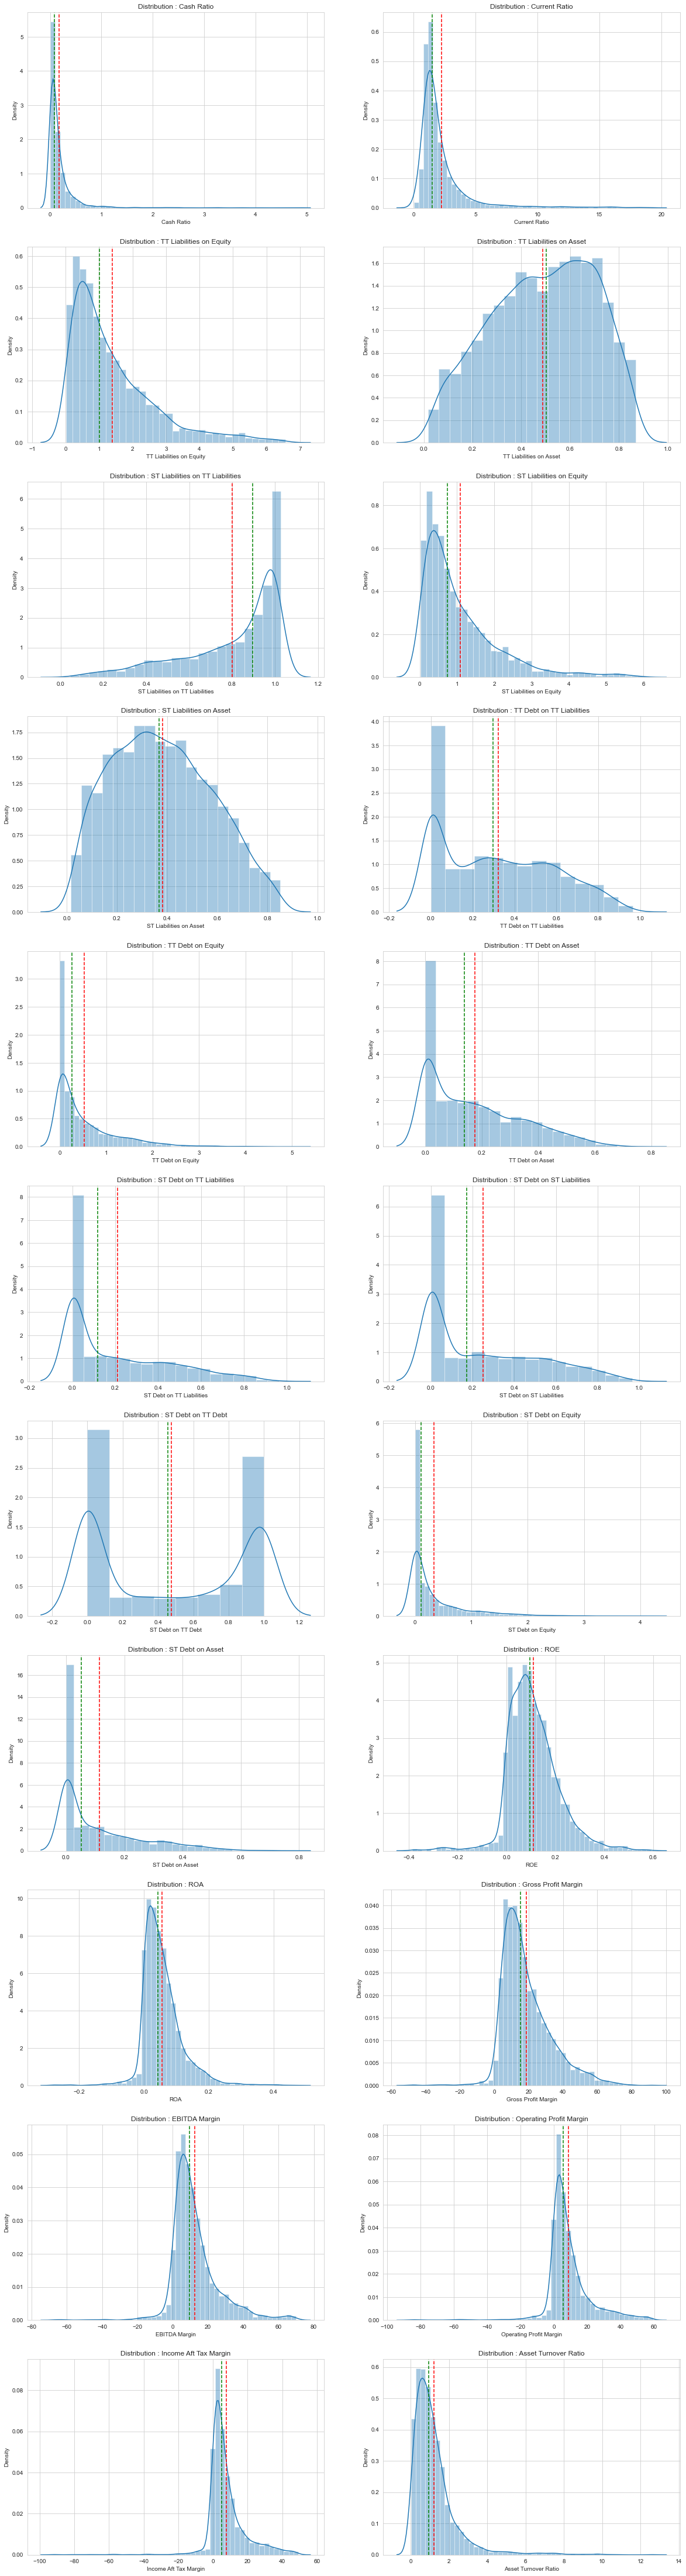

In [6]:
dis_plot(df)

# **DATA PREPROCESSING**

# *Scaling Data*

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = numerical_features
arr_scl = scaler.fit_transform(df[col])
df_scl = pd.DataFrame(data=arr_scl,columns=col)
df_scl.head()

Cash Ratio  Current Ratio  TT Liabilities on Equity  \
0    0.142939      -0.644633                 -0.649226   
1   -0.421399      -0.620886                 -0.366767   
2    0.046271      -0.580849                 -0.388503   
3   -0.084506      -0.713280                  0.178556   
4    0.699972       1.361855                 -0.970286   

   TT Liabilities on Asset  ST Liabilities on TT Liabilities  \
0                -0.557083                          0.849848   
1                -0.011819                         -2.491430   
2                -0.046653                         -0.217935   
3                 0.626370                         -1.082864   
4                -1.569185                          0.814134   

   ST Liabilities on Equity  ST Liabilities on Asset  \
0                 -0.478879                -0.067269   
1                 -0.830861                -1.359273   
2                 -0.381415                -0.116577   
3                 -0.176978                -0.196717   
4                 -0.863848                -1.141375   

   TT Debt on TT Liabilities  TT Debt on Equity  TT Debt on Asset  ...  \
0                  -1.203039          -0.785811         -1.052950  ...   
1                   1.665769           0.290741          1.184950  ...   
2                  -0.279912          -0.449374         -0.343673  ...   
3                   0.637110           0.403629          0.778238  ...   
4                  -1.203039          -0.785811         -1.052950  ...   

   ST Debt on Asset       ROE       ROA  Gross Profit Margin  EBITDA Margin  \
0         -0.794597 -0.369516 -0.182124             0.782107      -0.468537   
1         -0.794597  0.785500  0.693211             3.389045       3.607589   
2         -0.794597  0.091600  0.101345             1.257883      -0.211698   
3         -0.494404  0.304777 -0.035756             1.035596      -0.090024   
4         -0.794597 -0.942313 -0.751287            -0.864082      -1.009679   

   Operating Profit Margin  Income Aft Tax Margin  Asset Turnover Ratio  \
0                -0.483221              -0.499281              1.006970   
1                 2.660539               2.912794             -0.810661   
2                -0.364968              -0.342222              0.524857   
3                -0.522465              -0.416173              0.544897   
4                -0.608465              -0.598208              0.065109   

   Inflation       GDP  
0   1.483948 -1.595145  
1   1.483948 -1.595145  
2   1.483948 -1.595145  
3   1.483948 -1.595145  
4   1.483948 -1.595145  

[5 rows x 24 columns]

# *Data Encoding*

In [8]:
df_scl['Exchanges']= df['Exchanges'].map({'HOSE': 1, 'HNX': 0})
df_enc = df_scl.join(pd.get_dummies(df['Industry']))
df_enc.head()

Cash Ratio  Current Ratio  TT Liabilities on Equity  \
0    0.142939      -0.644633                 -0.649226   
1   -0.421399      -0.620886                 -0.366767   
2    0.046271      -0.580849                 -0.388503   
3   -0.084506      -0.713280                  0.178556   
4    0.699972       1.361855                 -0.970286   

   TT Liabilities on Asset  ST Liabilities on TT Liabilities  \
0                -0.557083                          0.849848   
1                -0.011819                         -2.491430   
2                -0.046653                         -0.217935   
3                 0.626370                         -1.082864   
4                -1.569185                          0.814134   

   ST Liabilities on Equity  ST Liabilities on Asset  \
0                 -0.478879                -0.067269   
1                 -0.830861                -1.359273   
2                 -0.381415                -0.116577   
3                 -0.176978                -0.196717   
4                 -0.863848                -1.141375   

   TT Debt on TT Liabilities  TT Debt on Equity  TT Debt on Asset  ...  \
0                  -1.203039          -0.785811         -1.052950  ...   
1                   1.665769           0.290741          1.184950  ...   
2                  -0.279912          -0.449374         -0.343673  ...   
3                   0.637110           0.403629          0.778238  ...   
4                  -1.203039          -0.785811         -1.052950  ...   

   sx_giadung  sx_maymoc  sx_nhuaHoachat  sx_phuTro  tbDien  thPham_doUong  \
0           0          0               0          0       0              0   
1           0          0               0          0       0              0   
2           0          0               0          0       0              0   
3           0          0               0          0       0              0   
4           0          0               0          0       0              0   

   tienIch  tuVan  vanTai_Kho  xayDung  
0        1      0           0        0  
1        1      0           0        0  
2        1      0           0        0  
3        1      0           0        0  
4        1      0           0        0  

[5 rows x 46 columns]

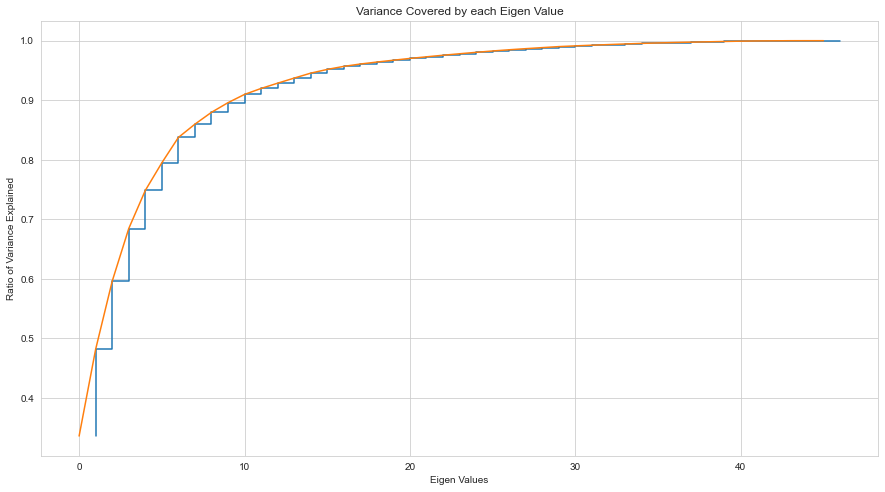

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_enc))
plt.figure(figsize=(15,8))
plt.step(list(range(1,47)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [10]:
np.cumsum(pca.explained_variance_ratio_)

array([0.3359346 , 0.48179049, 0.59601205, 0.68444356, 0.74839314,
       0.7948464 , 0.83744627, 0.85974985, 0.87964527, 0.89587719,
       0.90973595, 0.91976603, 0.92862207, 0.93715769, 0.94548265,
       0.95174014, 0.95684618, 0.96080606, 0.96410427, 0.96720903,
       0.97019477, 0.97292885, 0.97556049, 0.97804701, 0.9804374 ,
       0.98271792, 0.98475758, 0.98661031, 0.98835866, 0.990077  ,
       0.99129931, 0.99242108, 0.99346047, 0.99449572, 0.99544364,
       0.99620592, 0.99690057, 0.99753923, 0.99812478, 0.99867285,
       0.99920648, 0.99957989, 0.99979025, 0.99997233, 1.        ,
       1.        ])

In [11]:
df_core = pd.DataFrame(data = df_pca.iloc[:,:16].values,columns=['pca'+str(i) for i in range(1,17)])
df_core.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0 -2.215439  1.902202  1.357219  0.991165  1.382561 -0.577522 -0.157436   
1 -3.329074 -6.284793  1.102517 -1.701100  2.233593 -1.021135  0.245730   
2 -1.836250  0.529191  1.590104  0.291515  1.665950 -0.603483  0.383908   
3 -0.286791 -0.484789  1.679525 -0.443236  2.158252 -0.544690  1.252852   
4 -2.832036  3.172320  0.072305 -0.159346  2.007956  0.849493 -0.611891   

       pca8      pca9     pca10     pca11     pca12     pca13     pca14  \
0  0.811670  1.194025  0.662624  0.024207  0.266086  0.319354 -0.222139   
1  0.722705  1.428880  0.100383  0.059335 -0.210965 -0.050508 -0.084691   
2  0.786981  0.656032  0.727438  0.288640  0.441621 -0.044744 -0.410973   
3  0.653979  0.215309  0.429597  0.554889  0.726585  0.046273 -0.077496   
4 -0.615916  0.353668  0.321133 -0.414316 -0.290749  0.230489 -0.135136   

      pca15     pca16  
0 -0.471526  0.180677  
1  0.190451  0.269061  
2 -0.633580  0.196644  
3 -0.016083  0.517246  
4 -0.178380  0.138562

# **MODELING**

## *Find the best K*

In [12]:
from sklearn.cluster import KMeans
pca_arr = df_core.values
k_max = 30

## *Elbow Method*

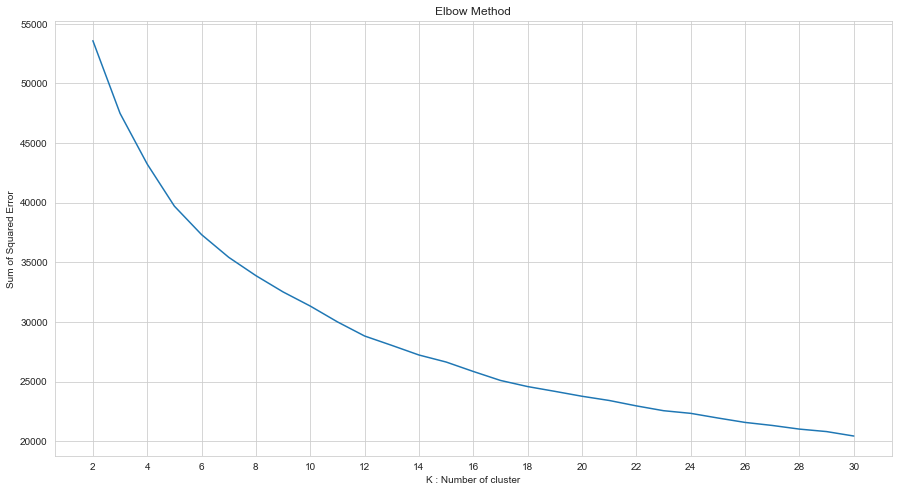

In [13]:
sse = {}
for k in range(2, k_max+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=8).fit(pca_arr)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(15,8))
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("K : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.xticks(range(2, k_max+1,2))
plt.show()

## *Silhouette Method*

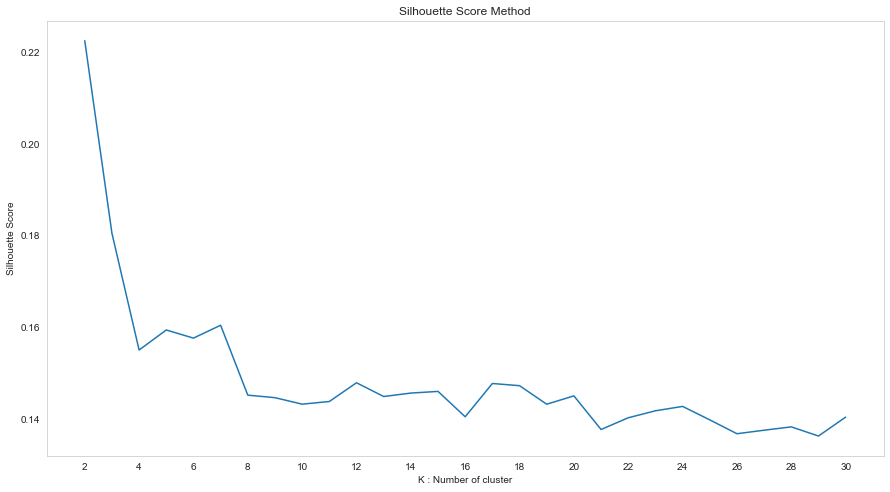

In [14]:
from sklearn.metrics import silhouette_score
sil = []

for k in range(2, k_max+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=8).fit(pca_arr)
    labels = kmeans.labels_
    sil.append(silhouette_score(pca_arr, labels, metric = 'euclidean',random_state=123))
plt.figure(figsize=(15,8))
sns.lineplot(x = range(2,k_max+1), y = sil)
plt.title('Silhouette Score Method')
plt.xlabel("K : Number of cluster")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, k_max+1,2))
plt.grid()
plt.show()

In [ ]:
# Silhouette Visualizing
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9, 2, figsize=(20,40))
for k in range(2,20):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=1000, random_state=8)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_arr)

## **Build Model with the best K**

In [16]:
model = KMeans(n_clusters = 8, init='k-means++', n_init=10, max_iter=1000, random_state=8) #5
model.fit(pca_arr)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['Class'] = labels
df_core['Class'] = labels
df['Class'].value_counts()

5    562
1    549
3    417
6    361
0    355
2    348
7    220
4    117
Name: Class, dtype: int64

# **DESCRIPTIVE STATISTICS**

## *3D plot*

In [17]:
import plotly.graph_objects as go
def threed_plot(df_3d,dim1,dim2,dim3):
    Scene = dict(xaxis = dict(title  = dim1),yaxis = dict(title  = dim2),zaxis = dict(title  = dim3))
    trace = go.Scatter3d(x=df_3d[dim1], y=df_3d[dim2], z=df_3d[dim3], mode='markers',marker=dict(color = df_3d['Class'], size=8, line=dict(color= 'black',width = 5)))
    layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
    dt = [trace]
    fig = go.Figure(data = dt, layout = layout)
    fig.show()

In [18]:
for dim in range(1,14,3):
    dim1 = 'pca' + str(dim)
    dim2 = 'pca' + str(dim+1)
    dim3 = 'pca' + str(dim+2)
    threed_plot(df_core,dim1,dim2,dim3)

## *Statistic*

In [ ]:
df.loc[:,['Cash Ratio','Class']].groupby('Class').describe()